# 실전 데이터 분석 : 캐글의 타이타닉 분석

##### 1. 데이터 가공 : Define Your Questions(문제정의)
- 생존률 예측하기

##### 2. 데이터 불러오기
- 캐글의 타이타닉 데이터 활용

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train = pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/titanic/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/titanic/test.csv')

##### 3. 데이터 살펴보기

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.shape

(891, 12)

In [11]:
test.shape

(418, 11)

In [ ]:
# 실습하기.
# 타이타닉 데이터에서 생존률과 생존자의 총 인원수를 구하기
# 성별에 따른 생존자와 사망자 구하기

In [32]:
total_people = train.Survived.count()
total_survived = train.loc[train.Survived == 1].Survived.sum()

In [43]:
survived_rate = total_survived / total_people
survived_rate *= 100
f'생존률: {survived_rate:.1f}%'

'생존률: 38.4%'

In [44]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [48]:
train.loc[train.Survived == 0, 'Sex'].value_counts()
train.loc[train.Survived == 1, 'Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [51]:
train.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

##### 데이터를 시각화

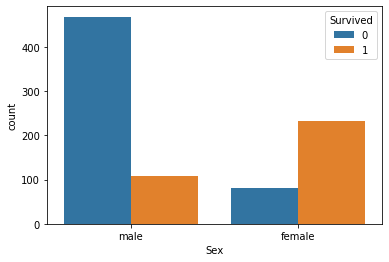

In [53]:
# 성별에 따른 분류
sns.countplot(data=train, x='Sex', hue='Survived')
pass

In [ ]:
# 클래스에 따른 시각화
# -Pclass: 1등급, 2등급, 3등급
# 1등급일수록 비싸고, 갑판과 가까움

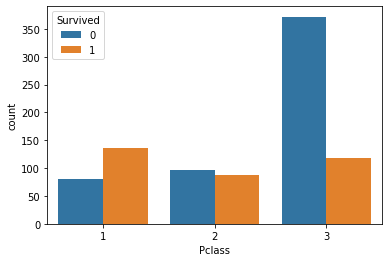

In [56]:
sns.countplot(data=train, x='Pclass', hue='Survived')
pass

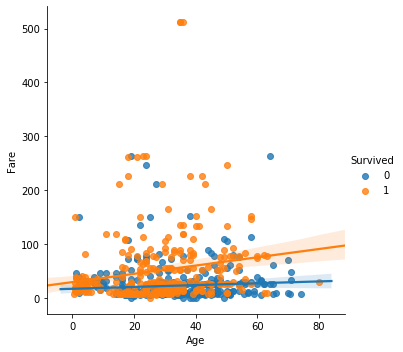

In [59]:
# 비용과 나이에 따른 분포도
sns.lmplot(data=train, x='Age', y='Fare', hue='Survived')

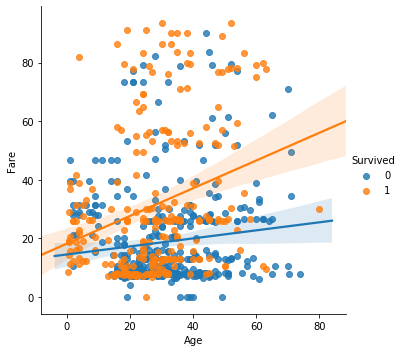

In [63]:
low_fare = train.loc[train.Fare < 100, :]
sns.lmplot(data=low_fare, x='Age', y='Fare', hue='Survived')
pass

##### 탐승지에 따른 분류
- Embarked: S는 영국의 사우샘프턴, C는 프랑스 세르부르, Q는 아일랜드의 퀸스타운

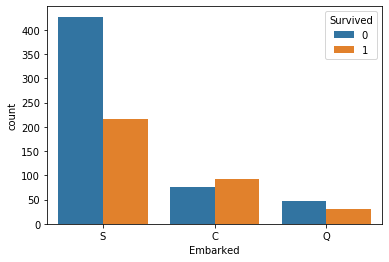

In [65]:
sns.countplot(data=train, x='Embarked', hue='Survived')
pass

### 4. 데이터 전처리
- 데이터 가공
- 결측치, Tidy(잡동사니), noise(잡음) 제거

In [143]:
# train의 결측치 채우기
# 탑승지역의 결측은 2개인데, 이 경우 가장 많은 S로 채워도 무방하다.
train['Embarked'].fillna(train['Embarked'].value_counts().max(), inplace=True)
test['Embarked'].fillna(test['Embarked'].value_counts().max(), inplace=True)

In [144]:
# 실습 test 데이터의 결측치를 채우기
# Fare를 0으로 채우기
train['Fare'].fillna(0, inplace=True)
test['Fare'].fillna(0, inplace=True)

##### 필요없는 컬럼을 삭제하기
- train에서 객실(Cabin), Ticket

In [146]:
# axis=1 -> 열을 삭제
# inplace=True => 변경된 데이터 적용
train.drop(['Cabin','Ticket'], axis=1, inplace=True)

KeyError: "['Cabin' 'Ticket'] not found in axis"

In [147]:
test.drop(['Cabin','Ticket'], axis=1, inplace=True)

In [148]:
# 성별의 데이터를 숫자로 변경하기
train['gender'] = train['Sex'].apply(lambda x: 0 if x=='male' else 1)
test['gender'] = test['Sex'].apply(lambda x: 0 if x=='male' else 1)

In [89]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,0


In [91]:
# 실습하기
# 탑승지를 숫자로 변경
# Embarked_group
# C는 2
# S는 1
# Q는 3

In [135]:
train['Embarked_group'] = train['Embarked'].apply(lambda x: 2 if x=='C' else (1 if x=='S' else 3))
test['Embarked_group'] = test['Embarked'].apply(lambda x: 2 if x=='C' else (1 if x=='S' else 3))

##### 금액별 구간 나누기

In [156]:
train['Fare_q'] = pd.qcut(train['Fare'], 4, labels=[1,2,3,4])

In [157]:
test['Fare_q'] = pd.qcut(test['Fare'], 4, labels=[1,2,3,4])

### 5. 특성으로부터 특성을 도출하기(Feature Engineering)
##### 예술의 영역
- is_solo 특성도출하기
- SibSp: 동승자(동방한 형제자매, 배우자)
- Parch: 동반한 부모, 자식 수

In [106]:
train['family_size'] = train['SibSp']+train['Parch'] + 1
train['is_solo'] = train['family_size'].apply(lambda x: 1 if x==1 else 0)

In [134]:
test['family_size'] = test['SibSp']+test['Parch'] + 1
test['is_solo'] = test['family_size'].apply(lambda x: 1 if x==1 else 0)

# 예측을 위한 데이터 연관 확인하기

In [115]:
# Fare_q의 데이터형을 숫자로 변경하기
train['Fare_q'] = train['Fare_q'].astype('int64')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId       891 non-null int64
Survived          891 non-null int64
Pclass            891 non-null int64
Name              891 non-null object
Sex               891 non-null object
Age               714 non-null float64
SibSp             891 non-null int64
Parch             891 non-null int64
Fare              891 non-null float64
Embarked          891 non-null object
gender            891 non-null int64
Embarked_group    891 non-null int64
Fare_q            891 non-null int64
family_size       891 non-null int64
is_solo           891 non-null int64
dtypes: float64(2), int64(10), object(3)
memory usage: 104.5+ KB


In [114]:
train.corr()['Survived']

PassengerId      -0.005007
Survived          1.000000
Pclass           -0.338481
Age              -0.077221
SibSp            -0.035322
Parch             0.081629
Fare              0.257307
gender            0.543351
Embarked_group    0.114954
Fare_q            0.299357
family_size       0.016639
is_solo          -0.203367
Name: Survived, dtype: float64

### 6. 모델 학습 및 예측

In [159]:
# 모델에서 사용할 특성(Feature) 선택하기
features = ['Pclass','gender','Fare_q','is_solo','Embarked_group']

In [160]:
# 학습시킬 데이터 만들기
x_train = train[features]
x_test = test[features]

In [161]:
y_train = train['Survived']

In [151]:
from sklearn.ensemble import RandomForestClassifier

In [162]:
# n_estimators=15 예측 수행 횟수
model = RandomForestClassifier(n_estimators=15)

In [163]:
# 모델 학습 시키기
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [164]:
# 학습한 모델을 이용하여 test 데이터로부터 예측을 실행하기
predic = model.predict(x_test)

In [167]:
submit = pd.read_csv('https://raw.githubusercontent.com/luxdolorosa/data_set/master/titanic/gender_submission.csv', index_col='PassengerId')

In [169]:
submit['Survived'] = predic

In [170]:
submit

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0
